# Autoencoders and an introduction to Artificial Neural Networks
Chapters 11 and 12 introduce us to Autoencoders, which are an unsupervised type of Artificial Neural Network (ANN) that can represent source input data in a compact fashion (_encoding step_) and restore the data from its compact form to a resonable facisimle (_decoding step_). One of the really cool properties about Autoencoders is that they are a form of ANN and Neural Network (NN) that can arbitrarily encode _any_ function so long as the following things hold true: (1) they include at least _one hidden layer_ or layer that cannot be directly manipulated as part of the network (other than its size) and (2) that the output of the encoding step is non-linear, and as such it uses an _activation function_ which turns the encoding step of the network into something non-linear. Examples of these functions include ones we've seen before as introduced in the book, e.g., _sigmoid_ (chapter 4), _tangent (tan)_ or a new one introduced, but not explained, _ReLU_ or _rectifying linear unit_. A side property of these functions is to not only turn the network non-linear, but also to represent _activation_ of the _neuron_ (really just one of the hidden layer values). If the neuron _fires_ then its activation is said to be represented by the non-linear function as _active_. So for example, in sigmoid, this would mean a resultant value of *1* or *0* if it hasn't fired and so on. Autoencoders have many uses in real life outside of data compression, for example:

   1. Anomaly Detection - If the Autoencoder learns a representation of a set of images, for example, and then another image that doesn't have a similar learned representation is provided to the network, the loss function variance should be quite different from those images trained in the network.
   2. De-noising - If provided an image containing ample noise (e.g., taken by a bad instrument or source, or manipulated in some way, through the internally learned representation of the network, the decoding step can actually restore or de-noise the image to its original or close to original form.
   3. Generative Neworks - for example to combine a learned representation of a bat, and a horse to generate (by averaging or using means) a "horse bat" or other things not seen before.
   
The first edition of the book doesn't include an end of chapter assignment suggestion, but the last thing you do in the first edition of the book for this listing is to download some images from the [CIFAR-10 Python Dataset](http://www.cs.toronto.edu/~kriz/cifar.html) which are labeled images from the [80 million tiny images dataset](http://people.csail.mit.edu/torralba/tinyimages/) of 10 classes/types of objects, and then to represent the images (*32 x 32* pixels in *RGB* format) using an Autoencoder. In particular the book shows you how to take the image, represent an image of 32x32 pixels in row major order (e.g., as a vector of \[1x1024\] pixels) and then for the R,G,B values in each pixel, how to average them into a greyscale intensity. From there, you can select, e.g., all the pictures of horses (5000 images), and build an Autoencoder network using Tensorflow to encode and decode the image and test out the learned representations of them image(s). 

I had to dig around in the first edition of the book code for some additional examples beyond this. I found [Ch07 Examples](https://github.com/BinRoot/TensorFlow-Book/tree/master/ch07_autoencoder) that had some cool additional things to check out, in particular:

   1. Image plotting code to show you the horses you are selecting, and also to plot their learned representations, so you can visualize the input and output of the network from CIFAR-10.
   2. Code to perform a _classify_ function - yes - Autoencoders can be used similar to regression techniques to take their learned representation and classify things of a particular type (e.g., train up on horse images, and then use the learned loss as a differentiator for other types of images (e.g., of a dog). Interestingly, the variation is small (likely due to the smallness of the images), only about *1.5* but it's still statistically significant and obviously this is something that you can threshold when building a classifier of a particular type. For example I imagine if you were to build a gun classifier for a particular type of semi-automatic gun, you would train on a bunch of those images into an Autoencoder network, and then test it against some other gun types to figure out the right loss-threshold balance that signifies the class of semi-automatic in a meaningful way.
   3. Code to do a De-Noising Autoencoder, see [this example](https://github.com/BinRoot/TensorFlow-Book/blob/master/ch07_autoencoder/Concept03_denoising.ipynb). I didn't play around with it directly but it is similar to this [other example](https://github.com/pkmital/tensorflow_tutorials/blob/master/python/08_denoising_autoencoder.py) I found though that example uses another style of Tensorflow network construction which looks to be more explicit than the implicit way the book is teaching us.
   4. Code to do a Deep Autoencoder, or [Stacked Autoencoder](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) like is discussed in the book. Ended up hooking this up to the Tensorflow Dataset API for fun.
   
I made a diagram of the encoding and decoding process. I was thinking of doing an assignment to build e.g., an automatic weapons classifier or "long gun" or something classifier as I was motivated by some of the prior [DARPA MEMEX](http://memex.jpl.nasa.gov/) work we did in the area. I may do one, but I understand the concept enough now that I felt I would simply annotate the last listings and move on to the next chapter.

![Autoencoder Process](../figs/ch12-autoencoder.png)

## References

   1. [CIFAR-10/-100 dataset](http://www.cs.toronto.edu/~kriz/cifar.html) - the key data used to illustrate the Autoencoder concepts.
   2. [Stanford's Unsupervised Learning Autoencoder chapter](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/) - A fantastic theoretical introduction to Autoencoders. A bit out of my league in the math, but worth a look if you want to understand the core theory.
   3. [Wikipedia article on Autoencoders](https://en.wikipedia.org/wiki/Autoencoder) - Besides the theory has some good use cases that explain what an Autoencoder is for.
   4. [Autoencoders and the CIFAR dataset](https://www.guru99.com/autoencoder-deep-learning.html) - Looks like this is where the book chose its examples from for Tensorflow although the examples here use the more explicit network creation methods in Tensorflow rather than the implicit stuff taught in the book.
   5. [Deep Autoencoders and Dimensionality Reduction](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) - Shows how Autoencoders are similar to PCA and other dimensionality reduction techniques.
   6. [Different use cases for Autoencoders](https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726) - Shows how Autoencoders are used for different use cases. 
   7. [Deep AutoEncoders using TensorFlow - Towards Data Science](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) - Great post for a 3 dimensional Deep auto encoder on MNIST. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle
import time

In [2]:
def get_batch(X, size):
    a = np.random.choice(len(X), size, replace=False)
    return X[a]

class Autoencoder:
    def __init__(self, input_dim, hidden_dim, epoch=1000, batch_size=50, learning_rate=0.001):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
        with tf.name_scope('encode'):
            weights = tf.Variable(tf.random_normal([input_dim, hidden_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([hidden_dim]), name='biases')
            encoded = tf.nn.sigmoid(tf.matmul(x, weights) + biases)
        with tf.name_scope('decode'):
            weights = tf.Variable(tf.random_normal([hidden_dim, input_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([input_dim]), name='biases')
            decoded = tf.matmul(encoded, weights) + biases

        self.x = x
        self.encoded = encoded
        self.decoded = decoded

        self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.decoded))))
        self.train_op = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.loss)
        
        self.saver = tf.train.Saver()

    def train(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epoch):
                for j in range(np.shape(data)[0] // self.batch_size):
                    batch_data = get_batch(data, self.batch_size)
                    l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x: batch_data})
                if i % 10 == 0:
                    print('epoch {0}: loss = {1}'.format(i, l))
                    self.saver.save(sess, '../models/model.ckpt')
            self.saver.save(sess, '../models/model.ckpt')
        
    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, '../models/model.ckpt')
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data})
        print('input', data)
        print('compressed', hidden)
        print('reconstructed', reconstructed)
        return reconstructed
    
    def classify(self, data, labels):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, '../models/model.ckpt')
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data})
            reconstructed = reconstructed[0]
            # loss = sess.run(self.all_loss, feed_dict={self.x: data})
            print('data', np.shape(data))
            print('reconstructed', np.shape(reconstructed))
            loss = np.sqrt(np.mean(np.square(data - reconstructed), axis=1))
            print('loss', np.shape(loss))
            horse_indices = np.where(labels == 7)[0]
            not_horse_indices = np.where(labels != 7)[0]
            horse_loss = np.mean(loss[horse_indices])
            not_horse_loss = np.mean(loss[not_horse_indices])
            print('horse', horse_loss)
            print('not horse', not_horse_loss)
            return hidden

    def decode(self, encoding):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, '../models/model.ckpt')
            reconstructed = sess.run(self.decoded, feed_dict={self.encoded: encoding})
        img = np.reshape(reconstructed, (32, 32))
        return img


In [3]:
def get_batch_n(X, Xn, size):
    a = np.random.choice(len(X), size, replace=False)
    return X[a], Xn[a]


class Denoiser:

    def __init__(self, input_dim, hidden_dim, epoch=10000, batch_size=50, learning_rate=0.001):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        self.x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='x')
        self.x_noised = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='x_noised')
        with tf.name_scope('encode'):
            self.weights1 = tf.Variable(tf.random_normal([input_dim, hidden_dim], dtype=tf.float32), name='weights')
            self.biases1 = tf.Variable(tf.zeros([hidden_dim]), name='biases')
            self.encoded = tf.nn.sigmoid(tf.matmul(self.x_noised, self.weights1) + self.biases1, name='encoded')
        with tf.name_scope('decode'):
            weights = tf.Variable(tf.random_normal([hidden_dim, input_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([input_dim]), name='biases')
            self.decoded = tf.matmul(self.encoded, weights) + biases
        self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.decoded))))
        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        self.saver = tf.train.Saver()

    def add_noise(self, data):
        noise_type = 'mask-0.2'
        if noise_type == 'gaussian':
            n = np.random.normal(0, 0.1, np.shape(data))
            return data + n
        if 'mask' in noise_type:
            frac = float(noise_type.split('-')[1])
            temp = np.copy(data)
            for i in temp:
                n = np.random.choice(len(i), round(frac * len(i)), replace=False)
                i[n] = 0
            return temp

    def train(self, data):
        data_noised = self.add_noise(data)
        with open('../data/log.csv', 'w') as writer:
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                for i in range(self.epoch):
                    for j in range(50):
                        batch_data, batch_data_noised = get_batch_n(data, data_noised, self.batch_size)
                        l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x: batch_data, self.x_noised: batch_data_noised})
                    if i % 10 == 0:
                        print('epoch {0}: loss = {1}'.format(i, l))
                        self.saver.save(sess, '../models/model.ckpt')
                        epoch_time = int(time.time())
                        row_str = str(epoch_time) + ',' + str(i) + ',' + str(l) + '\n'
                        writer.write(row_str)
                        writer.flush()
                self.saver.save(sess, '../models/model.ckpt')

    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, '../models/model.ckpt')
            data_noised = self.add_noise(data)
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data, self.x_noised:data_noised})
        print('input', data)
        print('compressed', hidden)
        print('reconstructed', reconstructed)
        return reconstructed
    
    def classify(self, data, labels):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, '../models/model.ckpt')
            data_noised = self.add_noise(data)
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data, self.x_noised:data_noised})
            reconstructed = reconstructed[0]
            # loss = sess.run(self.all_loss, feed_dict={self.x: data})
            print('data', np.shape(data))
            print('reconstructed', np.shape(reconstructed))
            loss = np.sqrt(np.mean(np.square(data - reconstructed), axis=1))
            print('loss', np.shape(loss))
            horse_indices = np.where(labels == 7)[0]
            not_horse_indices = np.where(labels != 7)[0]
            horse_loss = np.mean(loss[horse_indices])
            not_horse_loss = np.mean(loss[not_horse_indices])
            print('horse', horse_loss)
            print('not horse', not_horse_loss)
            return hidden

    def get_params(self):
        with tf.Session() as sess:
            self.saver.restore(sess, '../models/model.ckpt')
            weights, biases = sess.run([self.weights1, self.biases1])
        return weights, biases
    
    def decode(self, encoding):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, '../models/model.ckpt')
            reconstructed = sess.run(self.decoded, feed_dict={self.encoded: encoding})
        img = np.reshape(reconstructed, (32, 32))
        return img

In [4]:
class StackedAutoencoder:
    def __init__(self, input_dim, num_hidden_layers=3, epoch=100, batch_size=250, learning_rate=0.01):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.idim = [None]*num_hidden_layers
        self.hdim = [None]*num_hidden_layers
        self.hidden = [None]*num_hidden_layers
        self.weights = [None]*num_hidden_layers
        self.biases = [None]*num_hidden_layers

        x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
        initializer=tf.variance_scaling_initializer()
        #initializer=tf.random.normal
        output_dim = input_dim
        act=tf.nn.relu
        
        # network construction - [input to hidden]            
        for i in range(0, num_hidden_layers):
            self.idim[i] = int(input_dim / (2*i)) if i else input_dim 
            self.hdim[i] = int(input_dim / (2*(i+1))) if i < num_hidden_layers-1 else int(input_dim/2)
            print('%s, weights [%d, %d] biases %d' % ("hidden layer "+str(i+1) if i else "input to hidden layer 1", self.idim[i], self.hdim[i], self.hdim[i]))
            self.weights[i] = tf.Variable(initializer([self.idim[i], self.hdim[i]]), dtype=tf.float32, name='weights'+str(i))
            self.biases[i] = tf.Variable(tf.zeros([self.hdim[i]]), name='biases'+str(i))
            
            if i == 0:
                self.hidden[i] = act(tf.matmul(x, self.weights[i]) + self.biases[i])
            else:
                self.hidden[i] = act(tf.matmul(self.hidden[i-1], self.weights[i]) + self.biases[i])
        
        #output layer
        print('output layer, weights [%d, %d] biases %d' % (self.hdim[num_hidden_layers-1], output_dim, output_dim))
        self.output_weight = tf.Variable(initializer([self.hdim[num_hidden_layers-1], output_dim]), dtype=tf.float32, name='output_weight')
        self.output_bias = tf.Variable(tf.zeros([output_dim]), name='output_bias')
        self.output_layer = act(tf.matmul(self.hidden[num_hidden_layers-1], self.output_weight)+self.output_bias)


        self.x = x
        self.loss = tf.reduce_mean(tf.square(self.output_layer-self.x))
        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        #self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.output_layer))))
        #self.train_op = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.loss)
        
        self.saver = tf.train.Saver()

    def train(self, data):
        features = data
        features_placeholder = tf.placeholder(features.dtype, features.shape)
        dataset = tf.data.Dataset.from_tensor_slices((features_placeholder))
        dataset = dataset.shuffle(buffer_size=100)
        dataset = dataset.batch(self.batch_size)

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epoch):
                batch_num=0
                iter = dataset.make_initializable_iterator()
                sess.run(iter.initializer, feed_dict={features_placeholder: features})
                iter_op = iter.get_next()
                
                while True:
                    try:
                        batch_data = sess.run(iter_op)
                        l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x: batch_data})
                        batch_num += 1
                    except tf.errors.OutOfRangeError:
                        break
                
                print('epoch {0}: loss = {1}'.format(i, l))
                self.saver.save(sess, '../models/model.ckpt')
        
    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, '../models/model.ckpt')
            hidden, reconstructed = sess.run([self.hidden[num_hidden_layers-1], self.output_layer], feed_dict={self.x: data})
        print('input', data)
        print('compressed', hidden)
        print('reconstructed', reconstructed)
        return reconstructed
    
    def classify(self, data, labels):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, '../models/model.ckpt')
            hidden, reconstructed = sess.run([self.hidden[num_hidden_layers-1], self.output_layer], feed_dict={self.x: data})
            reconstructed = reconstructed[0]
            # loss = sess.run(self.all_loss, feed_dict={self.x: data})
            print('data', np.shape(data))
            print('reconstructed', np.shape(reconstructed))
            loss = np.sqrt(np.mean(np.square(data - reconstructed), axis=1))
            print('loss', np.shape(loss))
            horse_indices = np.where(labels == 7)[0]
            not_horse_indices = np.where(labels != 7)[0]
            horse_loss = np.mean(loss[horse_indices])
            not_horse_loss = np.mean(loss[not_horse_indices])
            print('horse', horse_loss)
            print('not horse', not_horse_loss)
            return hidden

    def decode(self, encoding):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, '../models/model.ckpt')
            reconstructed = sess.run(self.output_layer, feed_dict={self.hidden[num_hidden_layers-1]: encoding})
        img = np.reshape(reconstructed, (32, 32))
        return img
    
    def results(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, '../models/model.ckpt')
            results = sess.run(self.output_layer, feed_dict={self.x:data})
        
        return results

In [5]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [6]:
def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

In [7]:
names = unpickle('../data/cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = '../data/cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

In [8]:
data = grayscale(data)

In [9]:
x = np.matrix(data)
y = np.array(labels)
print(np.shape(x))
print(y)

(50000, 1024)
[6 9 9 ... 9 1 1]


In [10]:
horse_indices = np.where(y == 7)[0]
horse_x = x[horse_indices]
print(np.shape(horse_x))  # (5000, 3072)

(5000, 1024)


Some examples of horse images we will feed to the autoencoder for training


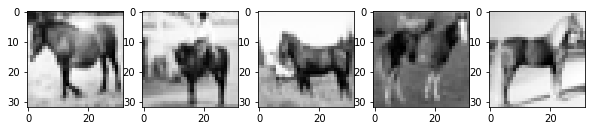

In [11]:
print('Some examples of horse images we will feed to the autoencoder for training')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(horse_x[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [12]:
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.train(horse_x)

W0801 16:38:55.981513 4598609344 deprecation.py:506] From /Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow_core/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


epoch 0: loss = 135.6302947998047
epoch 10: loss = 71.82732391357422
epoch 20: loss = 59.94108200073242
epoch 30: loss = 58.91762161254883
epoch 40: loss = 59.93063735961914
epoch 50: loss = 56.81950759887695
epoch 60: loss = 57.379295349121094
epoch 70: loss = 58.024044036865234
epoch 80: loss = 53.649173736572266
epoch 90: loss = 53.380306243896484
epoch 100: loss = 51.686676025390625
epoch 110: loss = 48.85186767578125
epoch 120: loss = 51.69575881958008
epoch 130: loss = 49.219398498535156
epoch 140: loss = 50.595703125
epoch 150: loss = 51.046852111816406
epoch 160: loss = 51.63508605957031
epoch 170: loss = 53.478477478027344
epoch 180: loss = 55.176055908203125
epoch 190: loss = 51.37305450439453
epoch 200: loss = 49.197303771972656
epoch 210: loss = 53.02531433105469
epoch 220: loss = 48.60901641845703
epoch 230: loss = 52.76494598388672
epoch 240: loss = 51.44184494018555
epoch 250: loss = 49.41845703125
epoch 260: loss = 52.35490036010742
epoch 270: loss = 51.25265884399414
e

In [13]:
test_data = unpickle('../data/cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
test_horse_indices = np.where(test_labels==7)[0]
test_horse = test_x[test_horse_indices]
encodings = ae.classify(test_x, test_labels)
encodings_horse = encodings[test_horse_indices]

data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 62.69270175230266
not horse 62.78474578674183


In [14]:
ae.test(test_horse)

input [[ 34.          60.66666667  36.33333333 ...   5.           3.66666667
    5.        ]
 [111.66666667 120.         116.         ... 205.66666667 204.33333333
  206.        ]
 [ 48.33333333  66.66666667  86.66666667 ... 135.33333333 133.66666667
  140.        ]
 ...
 [ 29.          43.33333333  58.66666667 ... 151.         151.33333333
  147.33333333]
 [100.66666667 108.66666667 109.66666667 ... 143.33333333 128.66666667
   85.33333333]
 [ 75.33333333 104.66666667 106.33333333 ... 108.33333333  63.66666667
   26.33333333]]
compressed [[1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
reconstructed [[ 59.76524   56.063625  61.519646 ...  52.990356  45.19686   45.890366]
 [ 77.268715  72.727974  71.70772  ... 163.03949  163.15143  165.50806 ]
 [194.24649  193.50778  195.58073  ... 134.34787  132.85347  134.90744 ]
 ...
 [ 67.17993   63.189697  64.55598  ... 147.22691  146.79001  

array([[ 59.76524 ,  56.063625,  61.519646, ...,  52.990356,  45.19686 ,
         45.890366],
       [ 77.268715,  72.727974,  71.70772 , ..., 163.03949 , 163.15143 ,
        165.50806 ],
       [194.24649 , 193.50778 , 195.58073 , ..., 134.34787 , 132.85347 ,
        134.90744 ],
       ...,
       [ 67.17993 ,  63.189697,  64.55598 , ..., 147.22691 , 146.79001 ,
        147.73674 ],
       [160.04745 , 160.65256 , 161.21394 , ..., 139.58057 , 138.3383  ,
        138.81801 ],
       [185.91698 , 186.52081 , 189.2485  , ..., 119.19501 , 119.15258 ,
        120.14424 ]], dtype=float32)

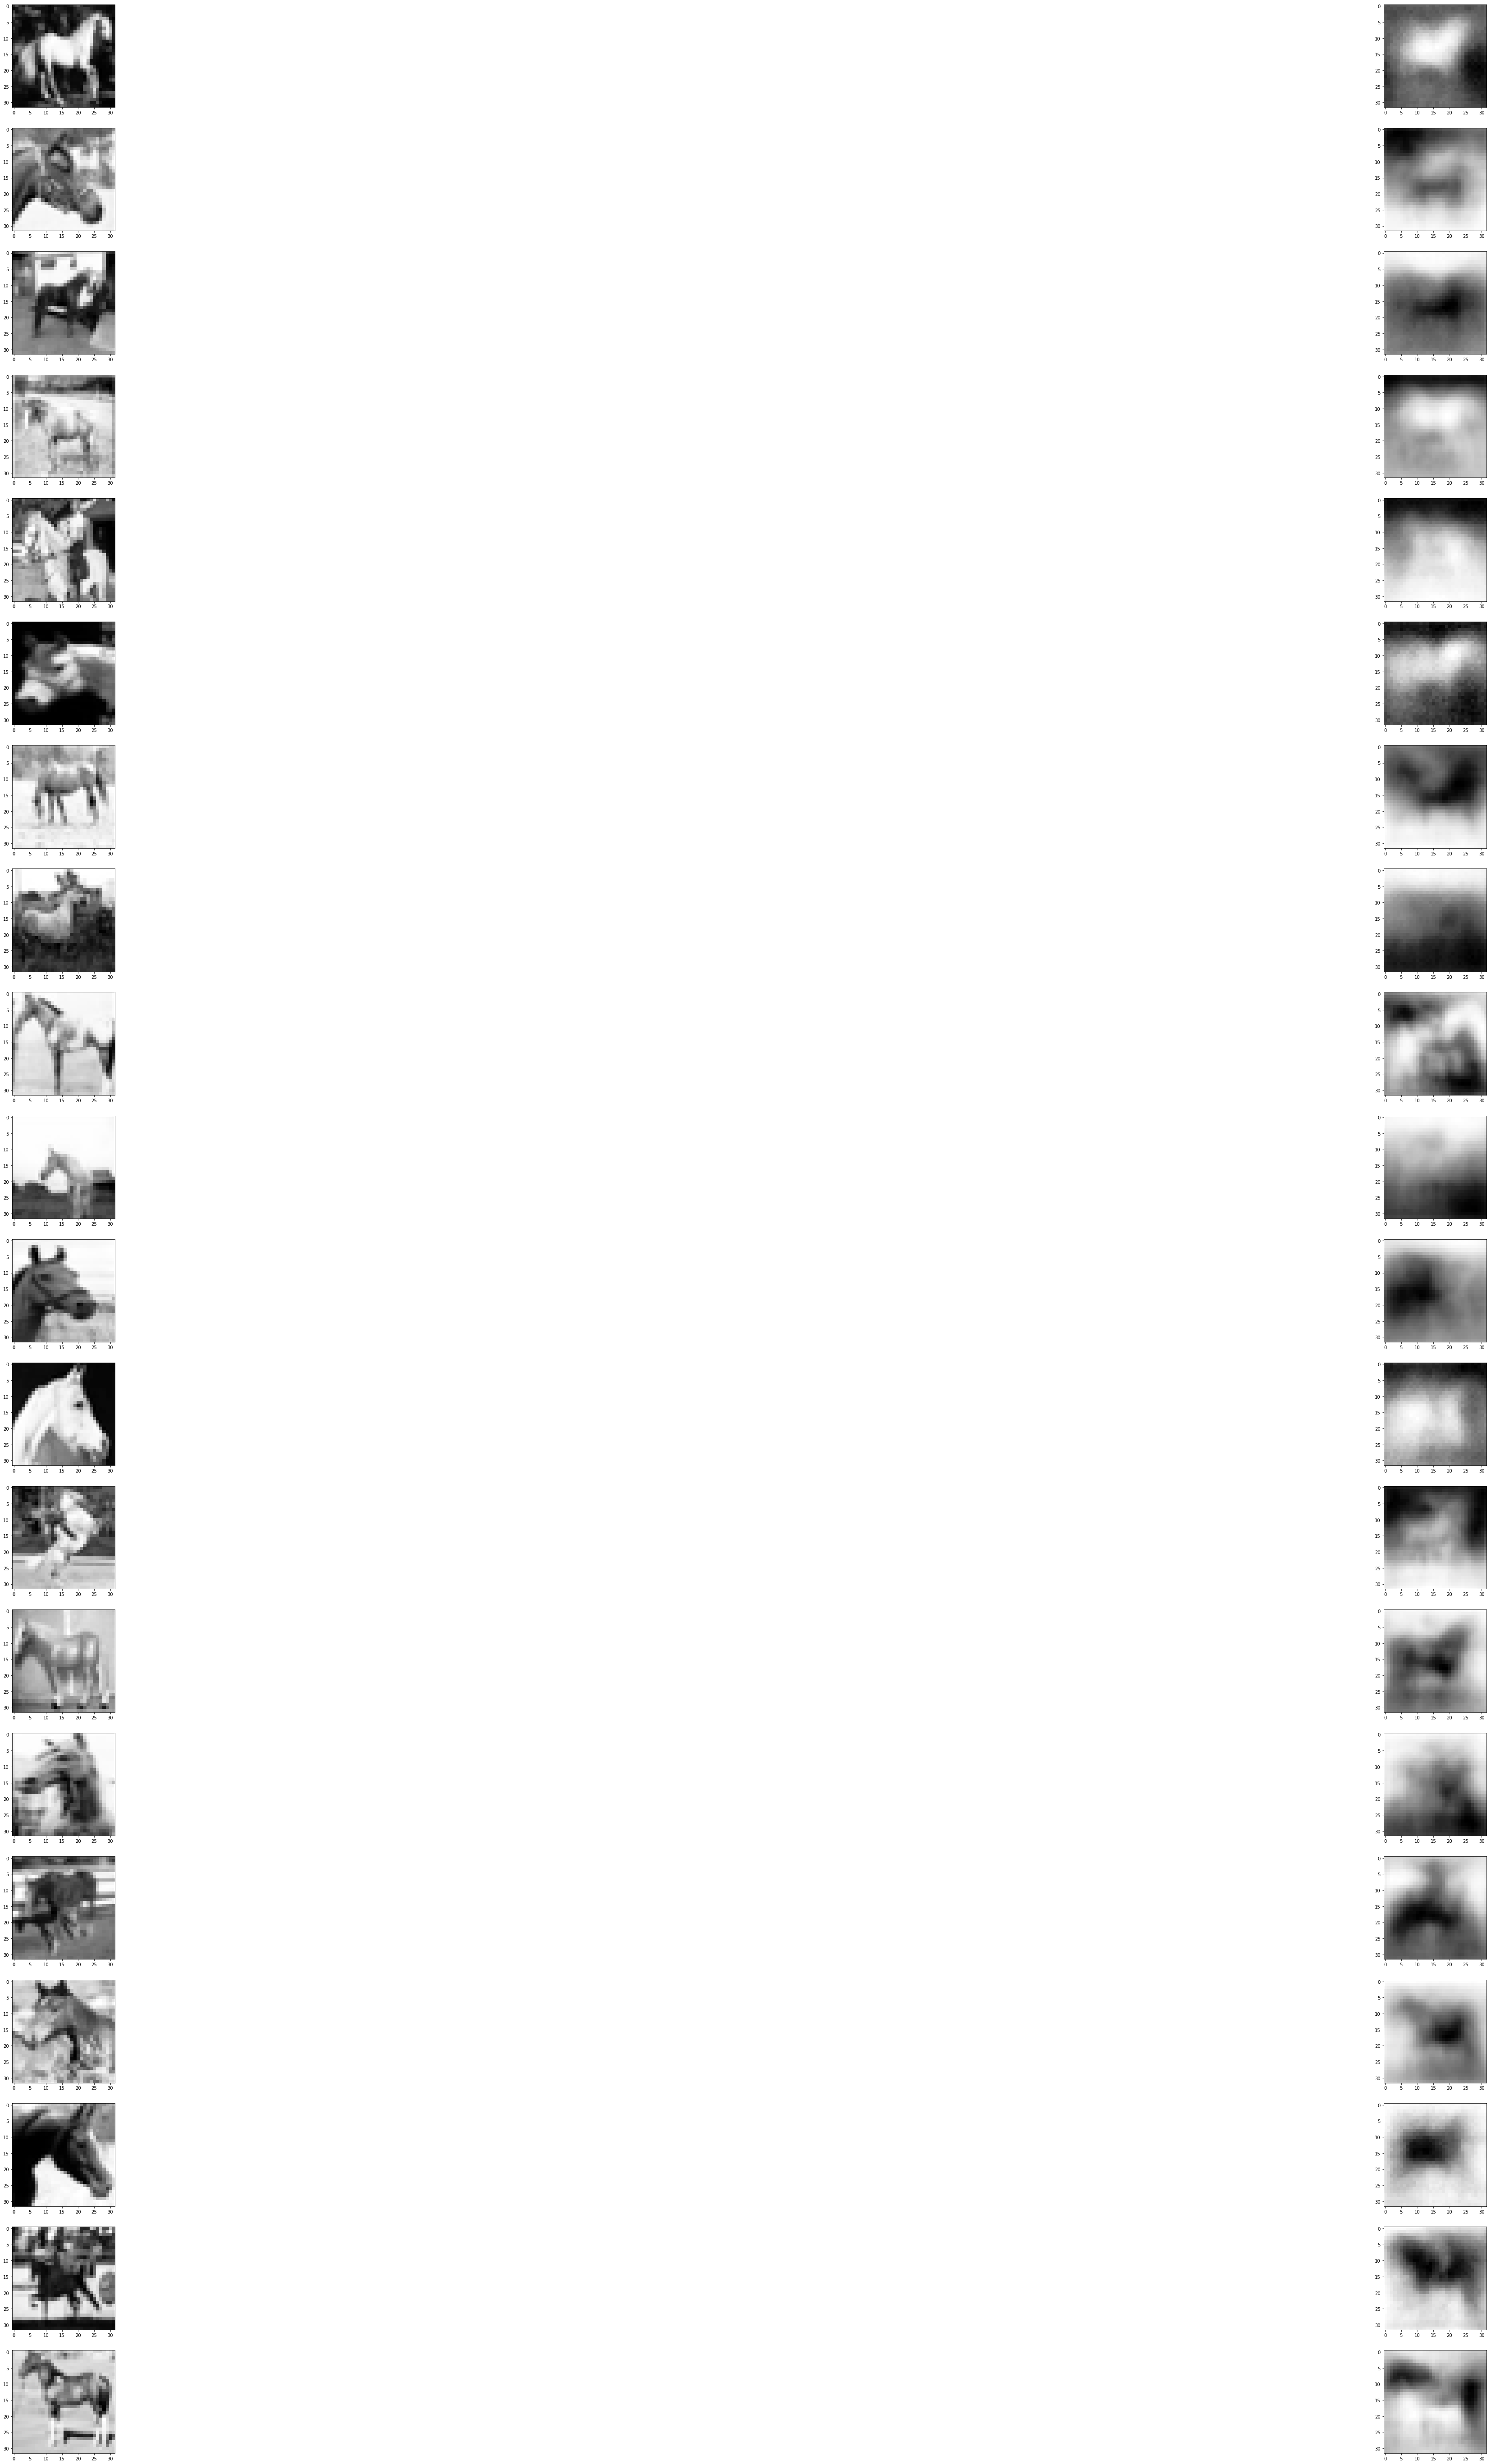

In [15]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_horse[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = ae.decode([encodings_horse[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()

In [16]:
ae_dn = Denoiser(input_dim, hidden_dim)
ae_dn.train(horse_x)

epoch 0: loss = 128.215576171875
epoch 10: loss = 86.88597106933594
epoch 20: loss = 65.20298767089844
epoch 30: loss = 60.94187545776367
epoch 40: loss = 59.00614929199219
epoch 50: loss = 56.235206604003906
epoch 60: loss = 60.37664031982422
epoch 70: loss = 60.84480285644531
epoch 80: loss = 63.94404983520508
epoch 90: loss = 59.530311584472656
epoch 100: loss = 60.490447998046875
epoch 110: loss = 62.93114471435547
epoch 120: loss = 58.7991828918457
epoch 130: loss = 59.268775939941406
epoch 140: loss = 56.778350830078125
epoch 150: loss = 58.09341812133789
epoch 160: loss = 56.421051025390625
epoch 170: loss = 59.624046325683594
epoch 180: loss = 55.78495407104492
epoch 190: loss = 51.0904426574707
epoch 200: loss = 51.54677200317383
epoch 210: loss = 54.61564636230469
epoch 220: loss = 53.58216857910156
epoch 230: loss = 55.698509216308594
epoch 240: loss = 57.97783660888672
epoch 250: loss = 53.04743576049805
epoch 260: loss = 58.996726989746094
epoch 270: loss = 53.695896148681

epoch 2240: loss = 46.31976318359375
epoch 2250: loss = 48.5499267578125
epoch 2260: loss = 48.53549575805664
epoch 2270: loss = 47.659889221191406
epoch 2280: loss = 48.06007766723633
epoch 2290: loss = 52.501216888427734
epoch 2300: loss = 50.9150505065918
epoch 2310: loss = 48.7100715637207
epoch 2320: loss = 47.40911102294922
epoch 2330: loss = 48.827693939208984
epoch 2340: loss = 47.77373504638672
epoch 2350: loss = 50.807212829589844
epoch 2360: loss = 48.85272216796875
epoch 2370: loss = 49.43805694580078
epoch 2380: loss = 51.81884765625
epoch 2390: loss = 51.81581497192383
epoch 2400: loss = 49.40520477294922
epoch 2410: loss = 48.84550094604492
epoch 2420: loss = 47.76101303100586
epoch 2430: loss = 47.456363677978516
epoch 2440: loss = 48.79650115966797
epoch 2450: loss = 47.86943817138672
epoch 2460: loss = 48.26630401611328
epoch 2470: loss = 51.61589813232422
epoch 2480: loss = 48.302001953125
epoch 2490: loss = 49.231807708740234
epoch 2500: loss = 45.80565643310547
epo

epoch 4450: loss = 49.23553466796875
epoch 4460: loss = 48.761207580566406
epoch 4470: loss = 48.071346282958984
epoch 4480: loss = 44.19590377807617
epoch 4490: loss = 46.67534255981445
epoch 4500: loss = 46.43909454345703
epoch 4510: loss = 45.273475646972656
epoch 4520: loss = 46.74142837524414
epoch 4530: loss = 46.41054153442383
epoch 4540: loss = 53.19700622558594
epoch 4550: loss = 48.261531829833984
epoch 4560: loss = 46.97284698486328
epoch 4570: loss = 48.529144287109375
epoch 4580: loss = 46.654335021972656
epoch 4590: loss = 51.83245086669922
epoch 4600: loss = 47.26980972290039
epoch 4610: loss = 47.88199234008789
epoch 4620: loss = 46.81555938720703
epoch 4630: loss = 45.31718444824219
epoch 4640: loss = 48.628292083740234
epoch 4650: loss = 47.993038177490234
epoch 4660: loss = 45.9235954284668
epoch 4670: loss = 48.84921646118164
epoch 4680: loss = 48.495601654052734
epoch 4690: loss = 49.278934478759766
epoch 4700: loss = 48.59420394897461
epoch 4710: loss = 47.4528350

epoch 6660: loss = 46.49605178833008
epoch 6670: loss = 49.64450454711914
epoch 6680: loss = 49.18039321899414
epoch 6690: loss = 48.894901275634766
epoch 6700: loss = 49.41109848022461
epoch 6710: loss = 46.265933990478516
epoch 6720: loss = 46.473358154296875
epoch 6730: loss = 44.128700256347656
epoch 6740: loss = 46.515480041503906
epoch 6750: loss = 46.867191314697266
epoch 6760: loss = 49.08095169067383
epoch 6770: loss = 48.733642578125
epoch 6780: loss = 45.60453414916992
epoch 6790: loss = 48.79073715209961
epoch 6800: loss = 48.768096923828125
epoch 6810: loss = 49.053348541259766
epoch 6820: loss = 46.35752487182617
epoch 6830: loss = 51.89055633544922
epoch 6840: loss = 49.71080780029297
epoch 6850: loss = 47.052955627441406
epoch 6860: loss = 48.90031433105469
epoch 6870: loss = 50.7255973815918
epoch 6880: loss = 47.04494094848633
epoch 6890: loss = 47.552162170410156
epoch 6900: loss = 49.01677703857422
epoch 6910: loss = 51.574951171875
epoch 6920: loss = 47.58126068115

epoch 8870: loss = 46.78923416137695
epoch 8880: loss = 46.4442024230957
epoch 8890: loss = 50.38330841064453
epoch 8900: loss = 43.830570220947266
epoch 8910: loss = 48.0908317565918
epoch 8920: loss = 48.49794387817383
epoch 8930: loss = 45.01693344116211
epoch 8940: loss = 51.0975456237793
epoch 8950: loss = 46.21953582763672
epoch 8960: loss = 45.5085563659668
epoch 8970: loss = 49.80548858642578
epoch 8980: loss = 47.67348861694336
epoch 8990: loss = 46.891136169433594
epoch 9000: loss = 49.69406509399414
epoch 9010: loss = 51.142818450927734
epoch 9020: loss = 48.412532806396484
epoch 9030: loss = 47.836673736572266
epoch 9040: loss = 47.1390380859375
epoch 9050: loss = 48.94342041015625
epoch 9060: loss = 47.44889450073242
epoch 9070: loss = 46.11506652832031
epoch 9080: loss = 50.61899948120117
epoch 9090: loss = 49.004364013671875
epoch 9100: loss = 47.373619079589844
epoch 9110: loss = 45.76869201660156
epoch 9120: loss = 47.94985580444336
epoch 9130: loss = 47.61293411254883

In [17]:
encodings = ae_dn.classify(test_x, test_labels)
encodings_horse = encodings[test_horse_indices]

data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 62.535382956198184
not horse 61.550771995638314


In [18]:
ae_dn.test(horse_x)

input [[ 34.          36.          41.33333333 ... 116.66666667 115.
  112.33333333]
 [147.66666667 170.33333333 166.         ... 129.         129.66666667
  133.        ]
 [207.66666667 204.66666667 204.66666667 ... 128.         128.33333333
  124.66666667]
 ...
 [221.33333333 217.33333333 225.33333333 ...  37.33333333 116.
  153.33333333]
 [159.          77.33333333  99.33333333 ... 234.33333333 225.66666667
  254.        ]
 [149.66666667 150.33333333 151.         ... 187.         179.33333333
  178.66666667]]
compressed [[1. 0. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 ...
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]]
reconstructed [[ 77.063835  74.14376   72.84328  ... 119.56291  120.52161  122.764404]
 [185.5663   184.6899   185.77106  ... 118.73249  120.452805 122.34032 ]
 [202.54343  205.04767  207.94797  ...  98.41308  100.214935 101.68855 ]
 ...
 [155.43797  157.41695  152.83232  ...  81.760506  86.20967   86.68463 ]
 [ 8

array([[ 77.063835,  74.14376 ,  72.84328 , ..., 119.56291 , 120.52161 ,
        122.764404],
       [185.5663  , 184.6899  , 185.77106 , ..., 118.73249 , 120.452805,
        122.34032 ],
       [202.54343 , 205.04767 , 207.94797 , ...,  98.41308 , 100.214935,
        101.68855 ],
       ...,
       [155.43797 , 157.41695 , 152.83232 , ...,  81.760506,  86.20967 ,
         86.68463 ],
       [ 89.30392 ,  86.43691 ,  85.84345 , ..., 169.86398 , 169.91423 ,
        171.07982 ],
       [ 91.78701 ,  89.13843 ,  88.38636 , ..., 177.47896 , 176.67897 ,
        177.78845 ]], dtype=float32)

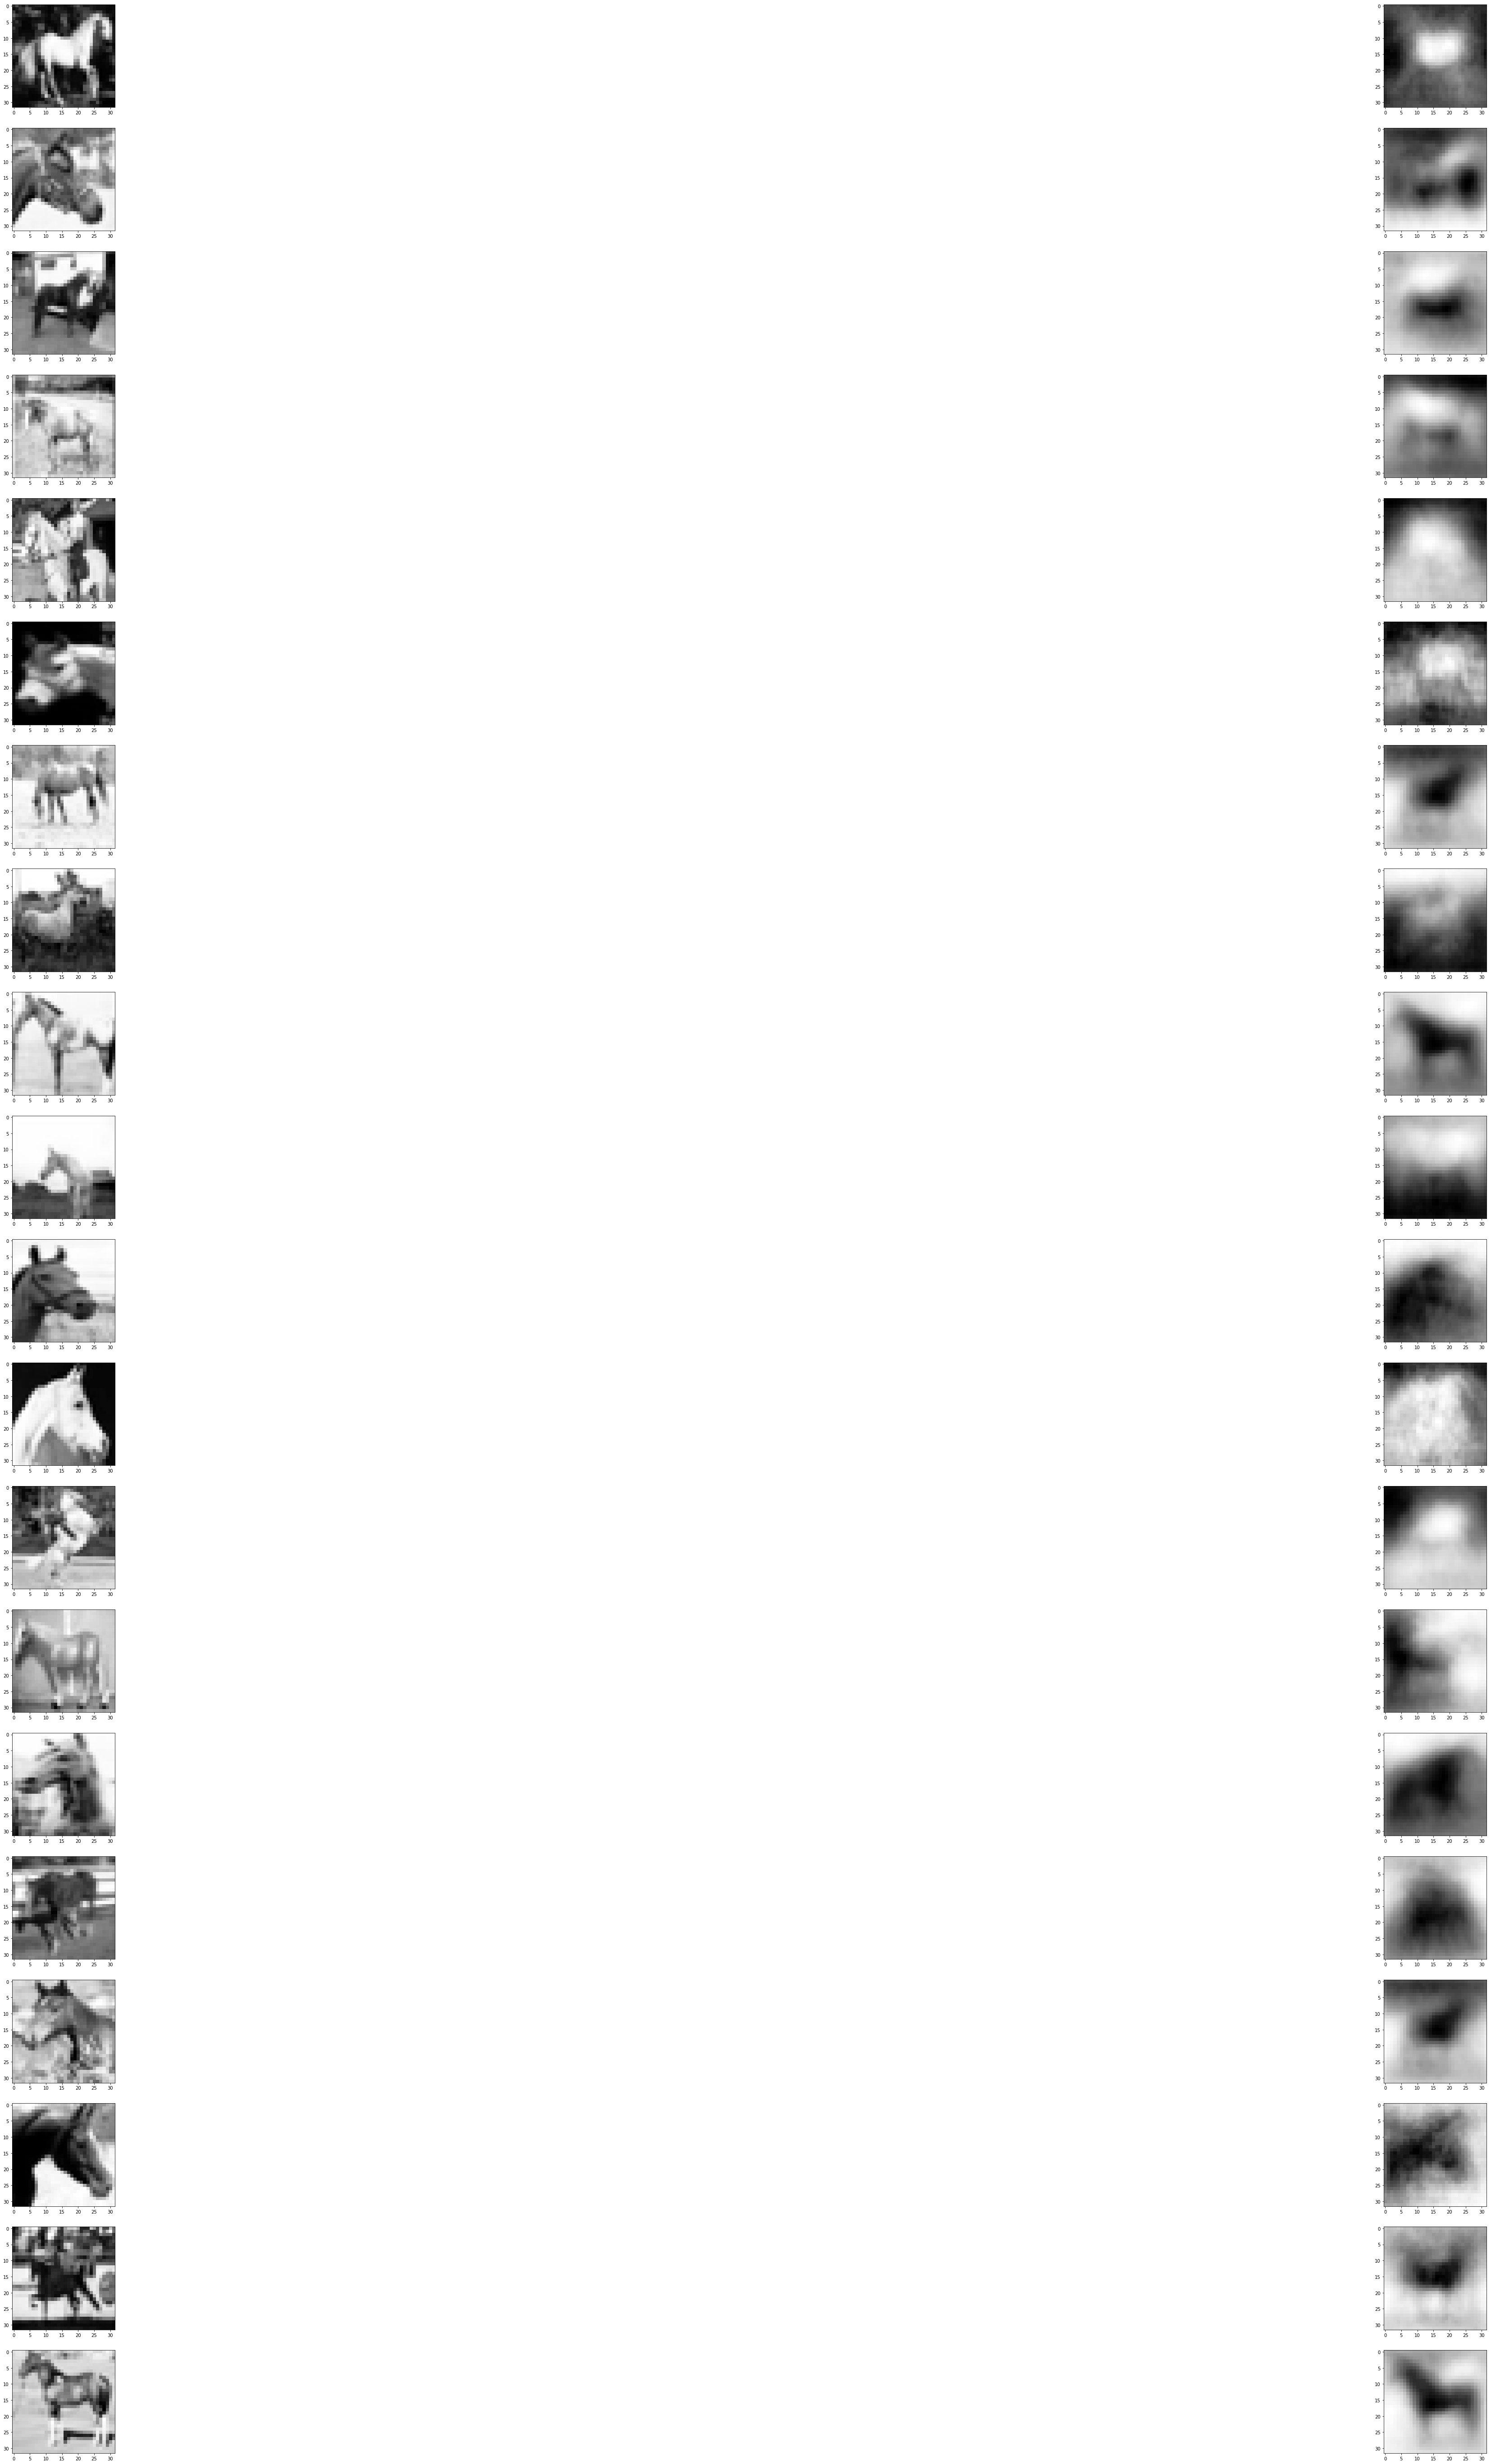

In [19]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_horse[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = ae_dn.decode([encodings_horse[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()

In [20]:
input_dim = np.shape(horse_x)[1]
num_hidden_layers = 3
s_ae = StackedAutoencoder(input_dim, num_hidden_layers=num_hidden_layers)
s_ae.train(horse_x)

input to hidden layer 1, weights [1024, 512] biases 512
hidden layer 2, weights [512, 256] biases 256
hidden layer 3, weights [256, 512] biases 512
output layer, weights [512, 1024] biases 1024


W0801 17:20:45.462360 4598609344 deprecation.py:323] From <ipython-input-4-97793b38297a>:57: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


epoch 0: loss = 4320.2861328125
epoch 1: loss = 3884.3994140625
epoch 2: loss = 7013.47509765625
epoch 3: loss = 3565.95849609375
epoch 4: loss = 3292.9951171875
epoch 5: loss = 3022.96728515625
epoch 6: loss = 2938.428466796875
epoch 7: loss = 2907.009765625
epoch 8: loss = 3006.524169921875
epoch 9: loss = 2823.910400390625
epoch 10: loss = 2754.5849609375
epoch 11: loss = 2576.428466796875
epoch 12: loss = 4648.322265625
epoch 13: loss = 2537.771484375
epoch 14: loss = 2509.472900390625
epoch 15: loss = 2406.78173828125
epoch 16: loss = 2337.66748046875
epoch 17: loss = 2354.468505859375
epoch 18: loss = 2414.71240234375
epoch 19: loss = 2394.62841796875
epoch 20: loss = 2331.318603515625
epoch 21: loss = 2344.30810546875
epoch 22: loss = 2356.034423828125
epoch 23: loss = 2355.37890625
epoch 24: loss = 2407.513427734375
epoch 25: loss = 2360.633544921875
epoch 26: loss = 2389.175537109375
epoch 27: loss = 2346.54248046875
epoch 28: loss = 2344.467529296875
epoch 29: loss = 2371.339

In [21]:
s_ae.test(test_x)

input [[106.33333333 105.66666667 110.66666667 ...  75.          82.33333333
   66.        ]
 [235.         231.         232.         ... 176.33333333 188.66666667
  195.        ]
 [190.         187.66666667 166.33333333 ...   6.33333333   4.
    7.33333333]
 ...
 [ 15.66666667  14.66666667  13.33333333 ...  32.33333333  34.
   30.66666667]
 [ 25.66666667  18.          27.33333333 ...  99.          99.66666667
   97.33333333]
 [ 75.33333333 104.66666667 106.33333333 ... 108.33333333  63.66666667
   26.33333333]]
compressed [[ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.       42.783375  0.      ]
 [ 0.        0.        0.       ...  0.       17.666714  0.      ]
 ...
 [ 0.        0.        0.       ...  0.        8.072277  0.      ]
 [ 0.        0.        0.       ...  0.       12.677552  0.      ]
 [ 0.        0.        0.       ...  0.       14.035001  0.      ]]
reconstructed [[ 99.500206  98.093056  99.463356 ...  98.42222 

array([[ 99.500206,  98.093056,  99.463356, ...,  98.42222 ,  99.43837 ,
         99.968834],
       [219.14154 , 223.07602 , 229.95863 , ...,  90.96366 ,  90.945274,
         91.21453 ],
       [202.84947 , 205.58673 , 210.45493 , ...,  69.67592 ,  70.9721  ,
         71.43559 ],
       ...,
       [ 19.649042,  16.936354,  13.540515, ...,  91.35764 ,  87.29956 ,
         84.47575 ],
       [ 65.344894,  65.594795,  67.340485, ..., 109.227844, 107.40574 ,
        107.88887 ],
       [144.19559 , 143.94289 , 146.28606 , ..., 113.96713 , 114.29322 ,
        115.24831 ]], dtype=float32)

In [22]:
test_data = unpickle('../data/cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
test_horse_indices = np.where(test_labels==7)[0]
test_horse = test_x[test_horse_indices]
encodings = s_ae.classify(test_x, test_labels)
encodings_horse = encodings[test_horse_indices]

data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 63.71147762824844
not horse 62.683927558175405


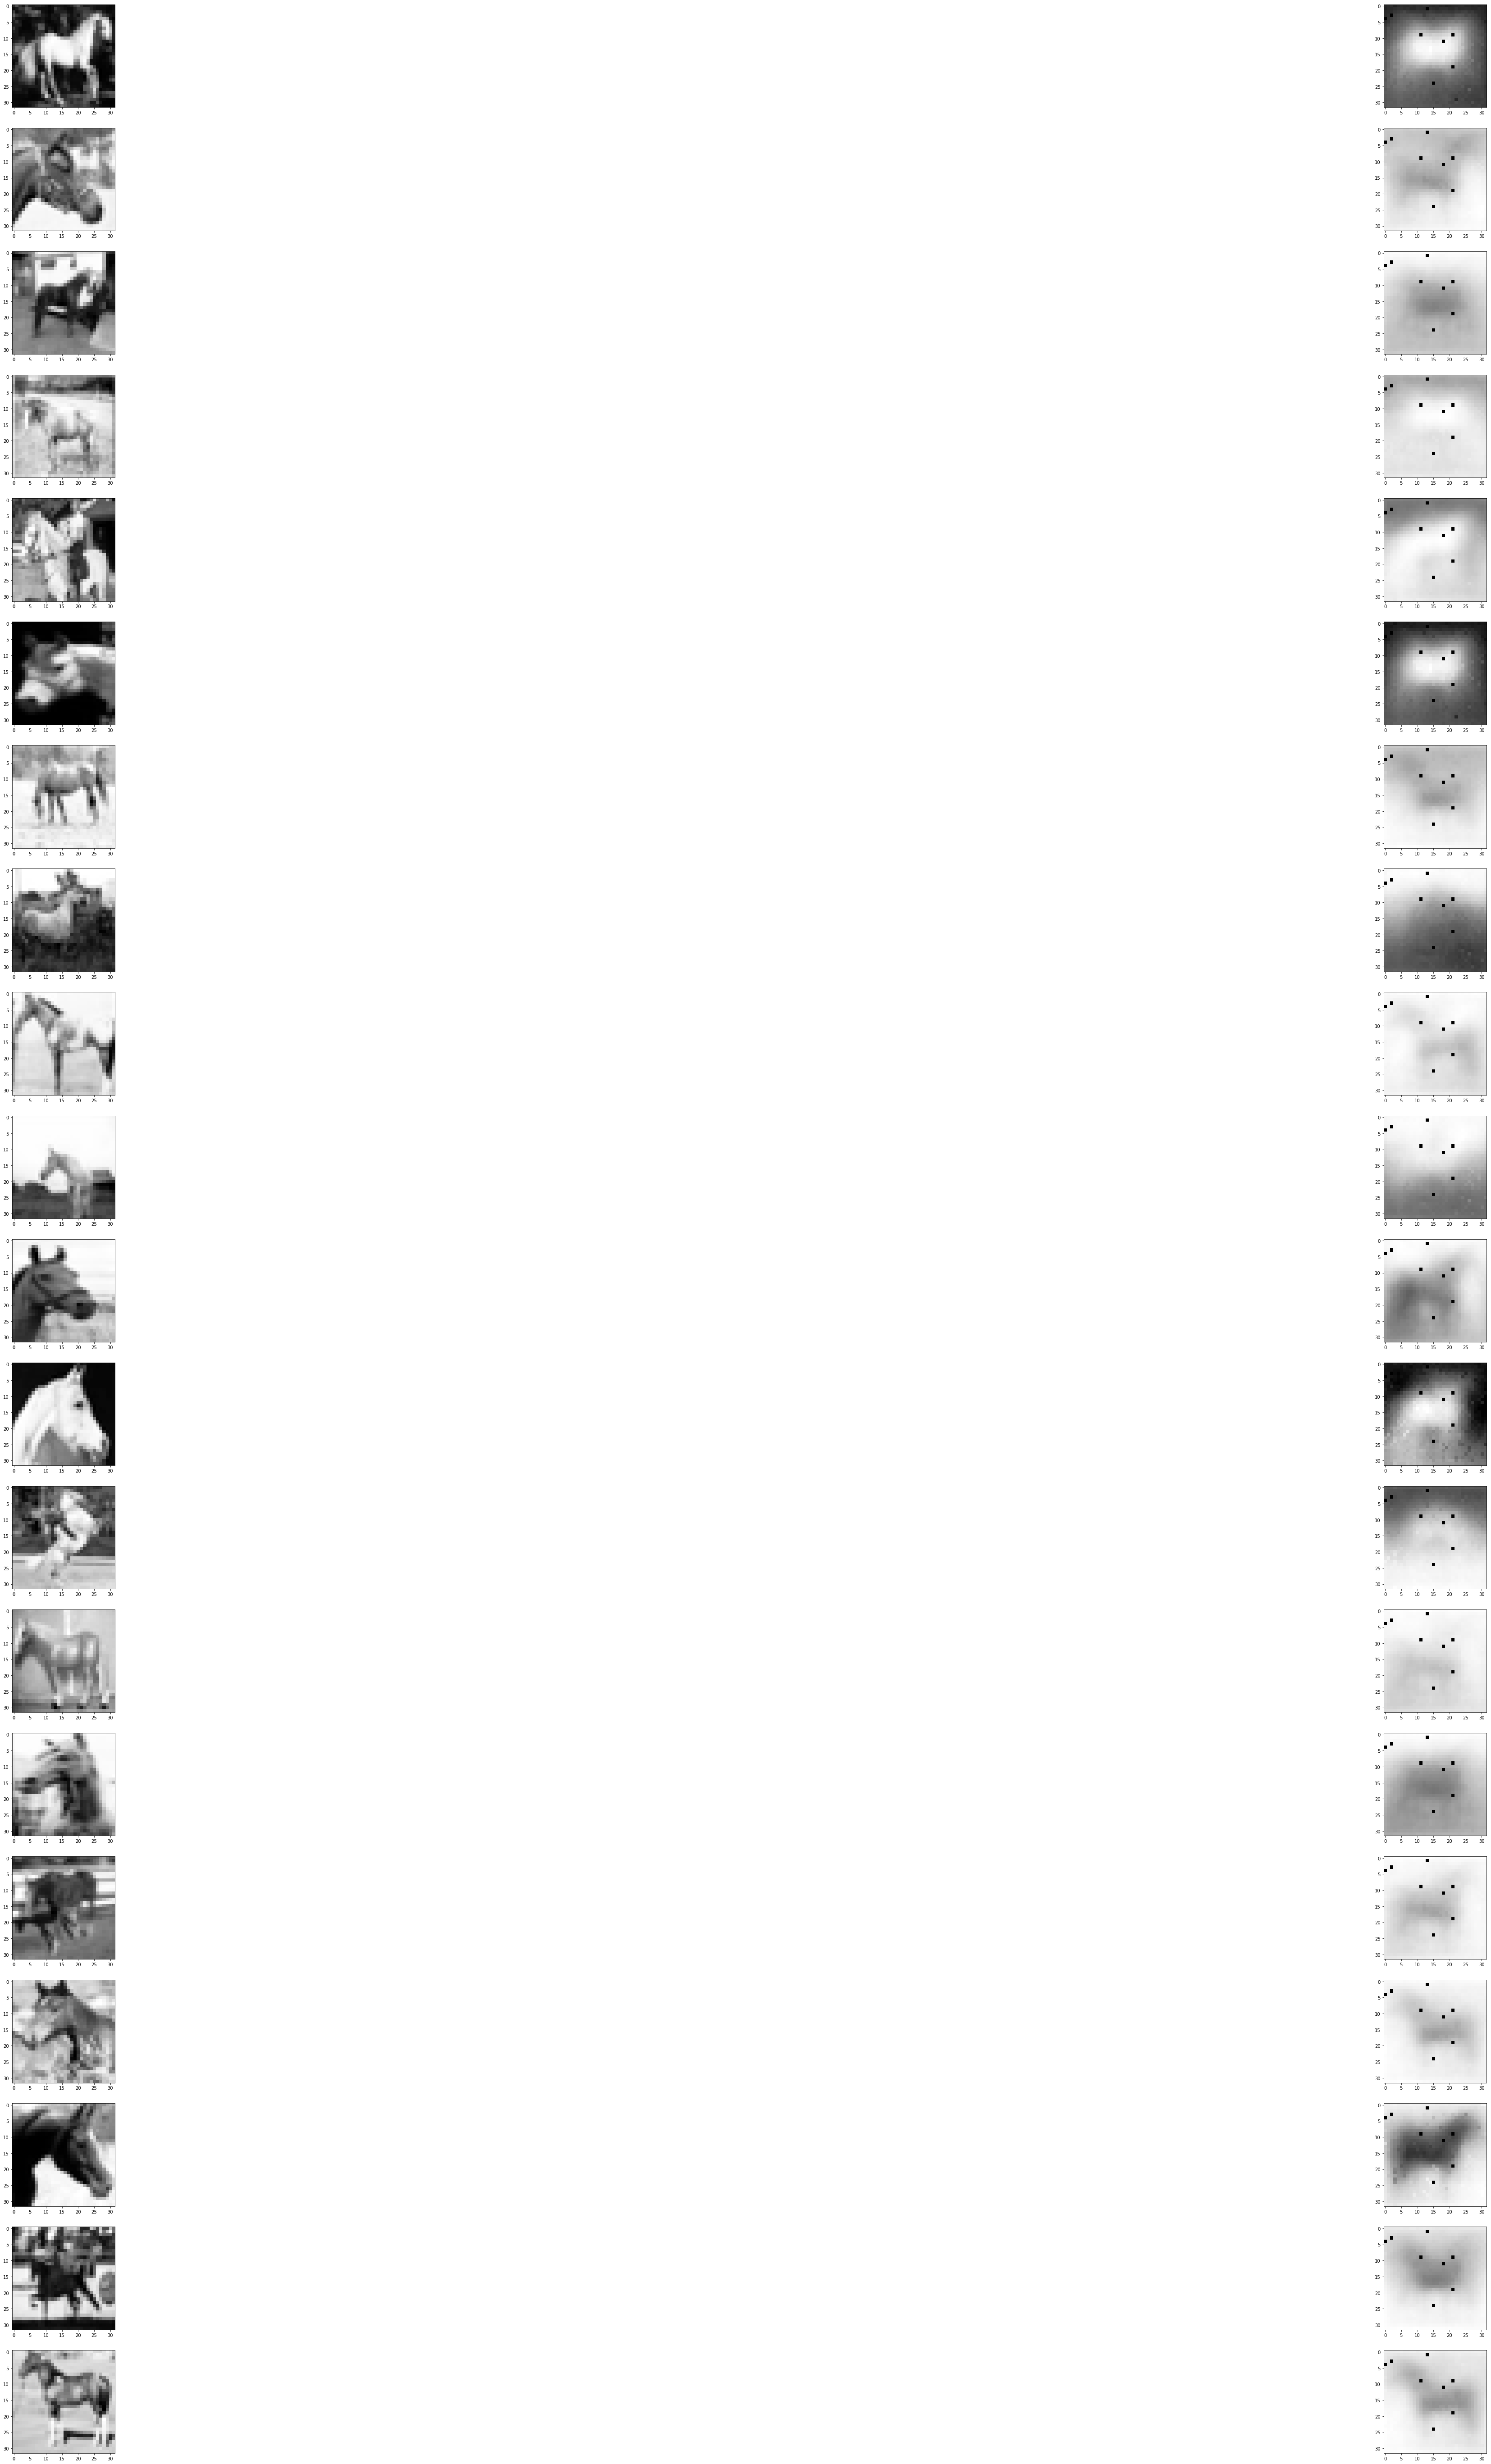

In [23]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_horse[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = s_ae.decode([encodings_horse[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()

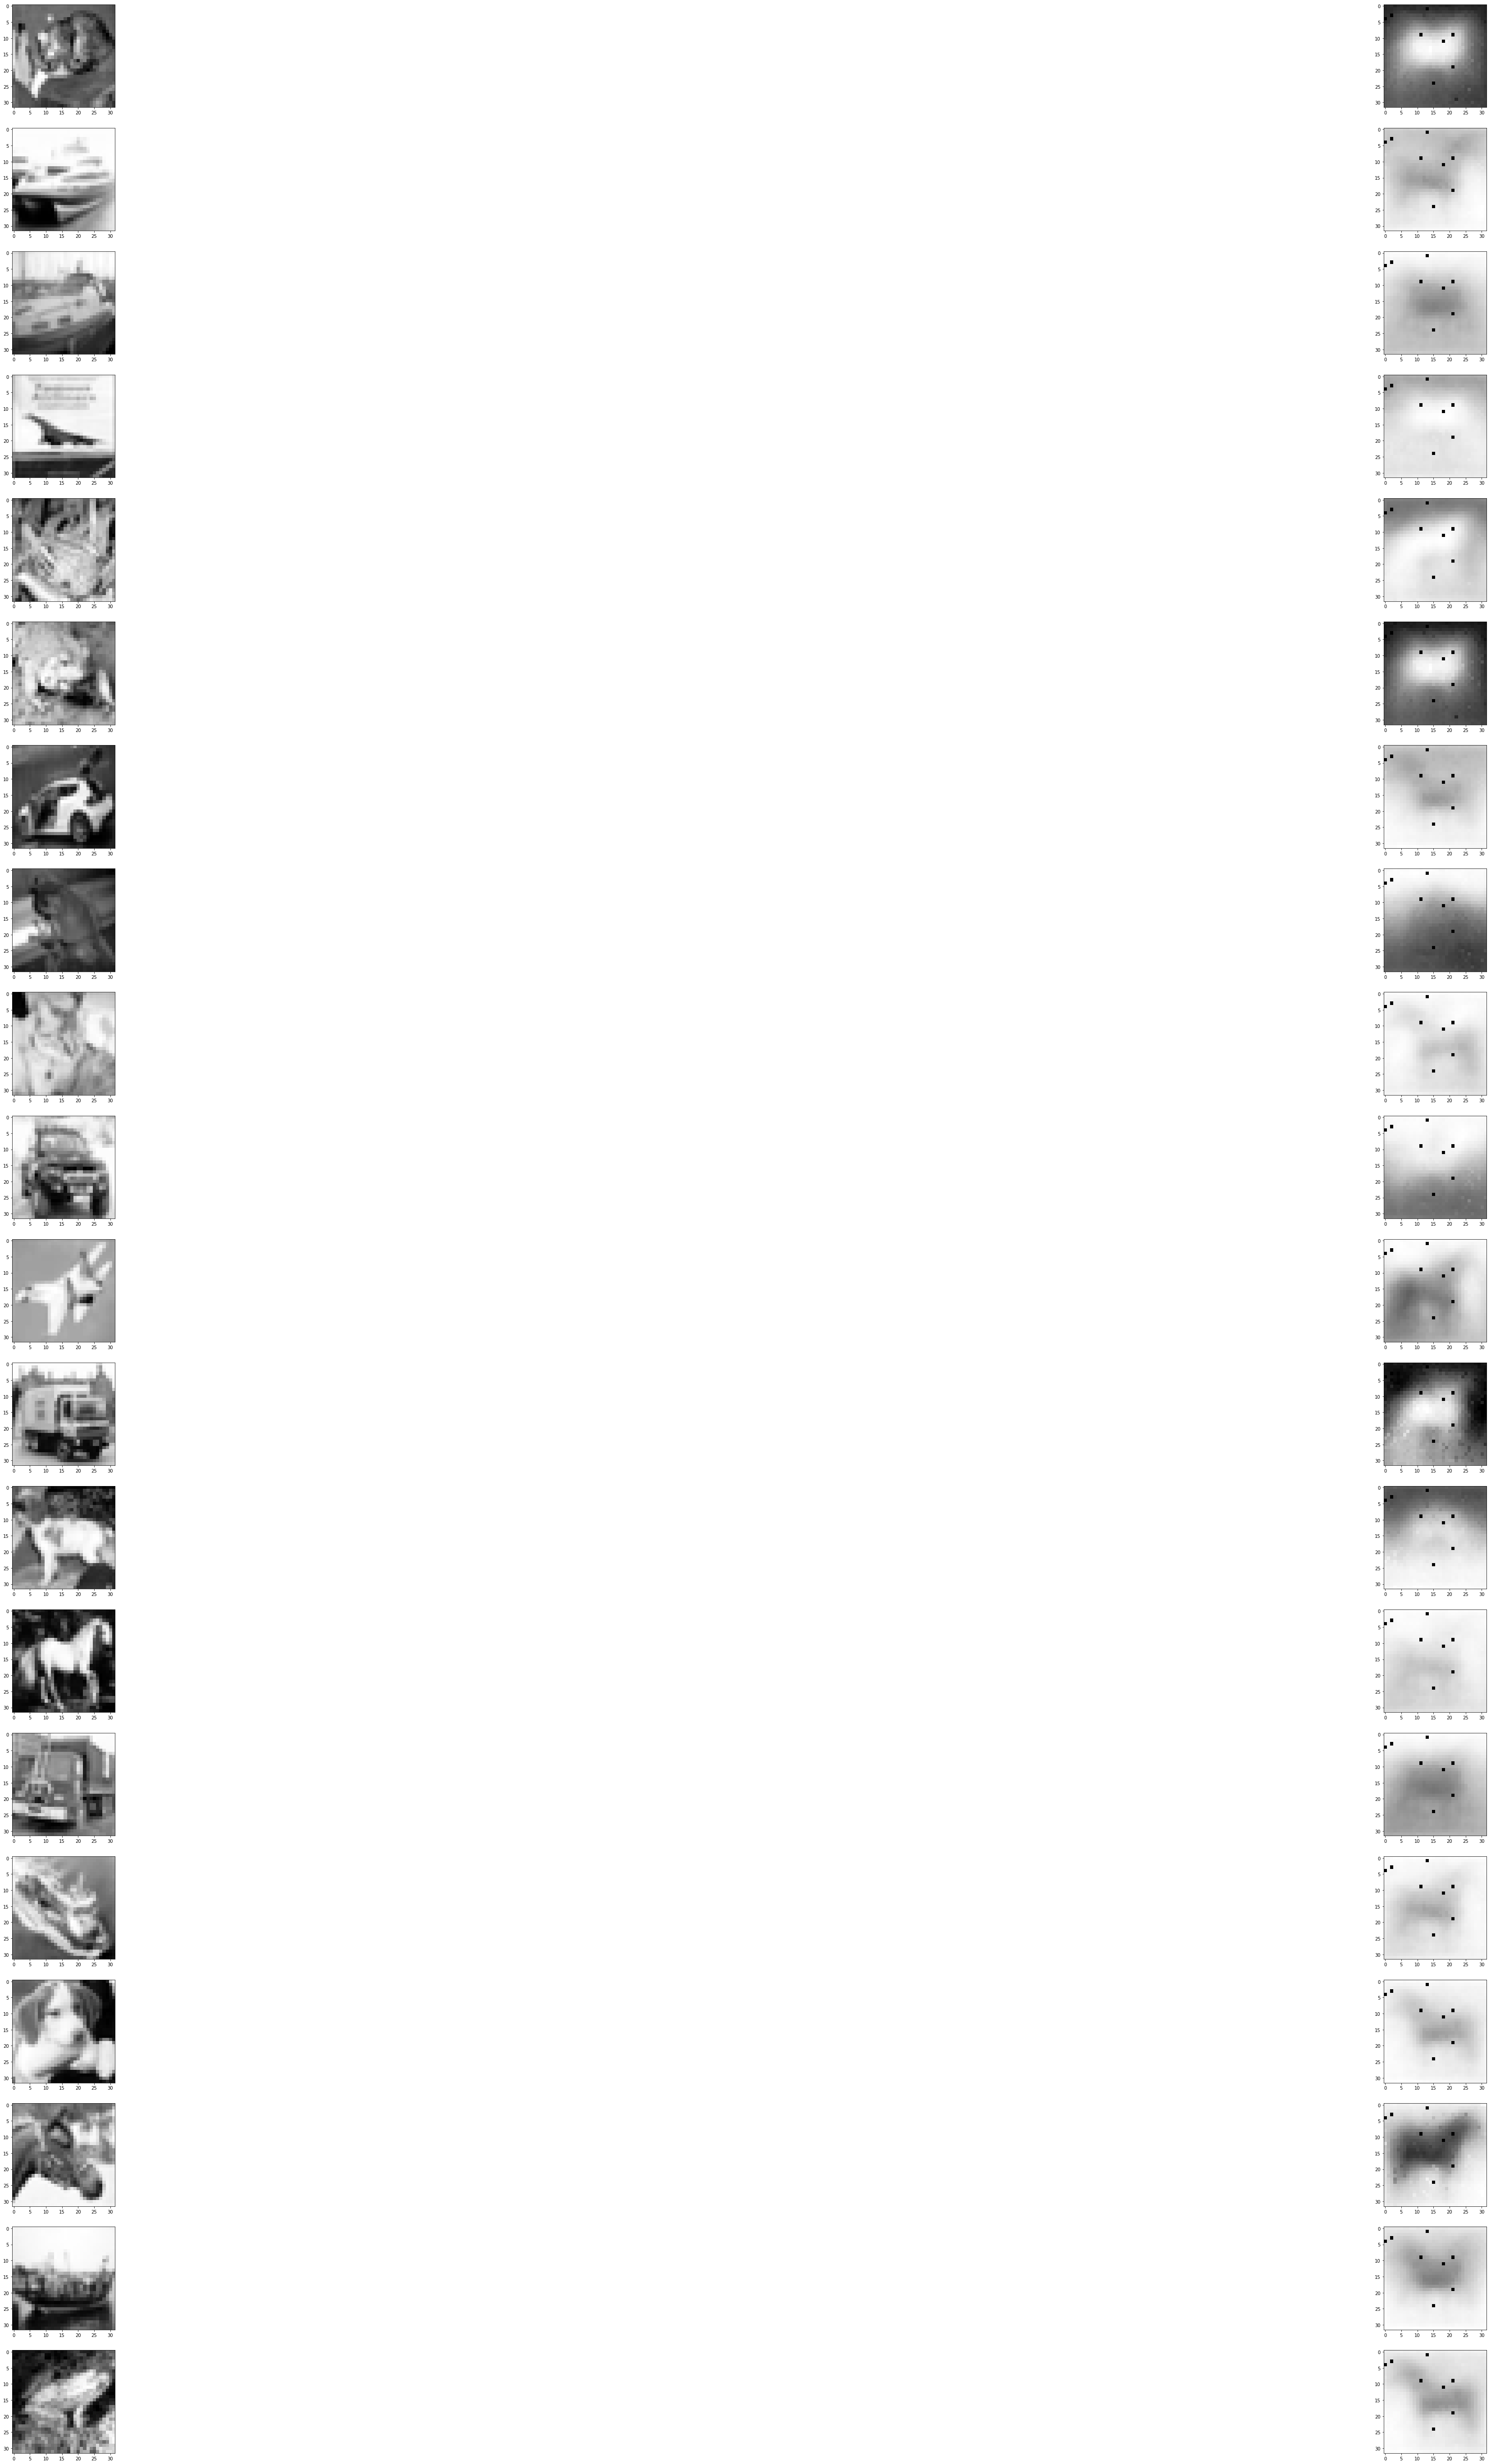

In [24]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_x[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = s_ae.results(test_horse[i, :].reshape(1,1024))
    plt.imshow(reconstructed_img.reshape(32,32), cmap='Greys_r')

plt.show()